In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

df = pd.read_csv("session_csv.csv") # reads the csv and creates the dataframe called movie
df.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [4]:
df_session_dummies = pd.get_dummies(df, columns=['action'])
# df_session_dummies.head(n=2)
# df_session_dummies_drop=df_session_dummies.drop(['created_at','value',],1)
# df_session_dummies.head()

In [5]:
df_search_cate = df_session_dummies[df_session_dummies.action_search_cate == 1 ]
df_search_cate=df_search_cate.drop(['action_click recommended menues','action_click recommended menu','action_click_genetic_rec','action_enter','action_enter_store','action_like','action_search_input','action_กรอกประวัติความหิว','action_สั่งอาหาร','action_เพิ่มเข้าตะกร้า','action_ใช้โค้ด'],1)
df_search_cate = df_search_cate.dropna()
df_search_cate_dummies = pd.get_dummies(df_search_cate, columns=['value'])
# df_search_cate_dummies.head()

In [6]:
new_df = pd.DataFrame(columns = ['user_id','value_all','value_delivery','value_ของหวาน','value_ชาบู','value_ปิ้งย่าง','value_สเต็ก',
        'value_อาหารญี่ปุ่น','value_อาหารเกาหลี','value_อาหารไทย','value_เครื่องดื่ม',])
for k,i in df_search_cate_dummies.iterrows():
    if any(new_df.user_id == i['user_id']) :

        index=new_df[new_df['user_id']== i['user_id']].index.item()
        
        
        if new_df.iloc[index]['value_all'] == 0  :
            new_df.set_value(index, 'value_all', i['value_all'])
        if new_df.iloc[index]['value_delivery'] == 0 :
            new_df.set_value(index, 'value_delivery',  i['value_delivery'])
        if new_df.iloc[index]['value_ของหวาน'] == 0 :
            new_df.set_value(index, 'value_ของหวาน',  i['value_ของหวาน'])
        if new_df.iloc[index]['value_ชาบู'] == 0  :
            new_df.set_value(index, 'value_ชาบู', i['value_ชาบู'])
        if new_df.iloc[index]['value_ปิ้งย่าง'] == 0  :
            new_df.set_value(index, 'value_ปิ้งย่าง', i['value_ปิ้งย่าง'])
        if new_df.iloc[index]['value_สเต็ก'] == 0  :
            new_df.set_value(index, 'value_สเต็ก', i['value_สเต็ก'])
        if new_df.iloc[index]['value_อาหารญี่ปุ่น'] == 0  :
            new_df.set_value(index, 'value_อาหารญี่ปุ่น', i['value_อาหารญี่ปุ่น'])
        if new_df.iloc[index]['value_อาหารเกาหลี'] == 0  :
            new_df.set_value(index, 'value_อาหารเกาหลี', i['value_อาหารเกาหลี'])
        if new_df.iloc[index]['value_อาหารไทย'] == 0  :
            new_df.set_value(index, 'value_อาหารไทย', i['value_อาหารไทย'])
        if new_df.iloc[index]['value_เครื่องดื่ม'] == 0  :
            new_df.set_value(index, 'value_เครื่องดื่ม', i['value_เครื่องดื่ม'])
   


    else :
        new_df.loc[len(new_df)] = [i['user_id'],i['value_all'],i['value_delivery'],i['value_ของหวาน'],
                                   i['value_ชาบู'],i['value_ปิ้งย่าง'],i['value_สเต็ก'],i['value_อาหารญี่ปุ่น'],
                                   i['value_อาหารเกาหลี'],i['value_อาหารไทย'],i['value_เครื่องดื่ม']]
                                       

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .ia

In [8]:
# new_df.ix[:,1:11]

In [15]:
new_df
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(new_df.ix[:,1:11])
new_df_k_mode = new_df
# pca_transformed = pca.fit_transform(X_scaled)
# plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 365.0
Run 1, iteration: 2/100, moves: 17, cost: 365.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 363.0
Run 3, iteration: 2/100, moves: 0, cost: 363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 381.0
Run 4, iteration: 2/100, moves: 0, cost: 381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 360.0
Run 5, iteration: 2/100, moves: 0, cost: 360.0
Best run was number 5


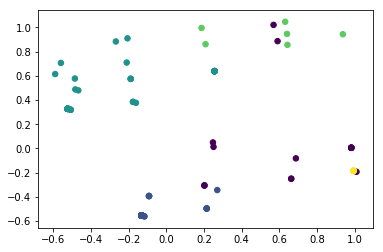

In [16]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,:19])
plot_columns = pca.fit_transform(new_df_k_mode.ix[:,1:11])

x = new_df_k_mode.reset_index().values

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
new_df_k_mode['cluster'] = clusters





# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=new_df_k_mode["cluster"], s=30)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
# iris = datasets.load_iris()
# X = df7.ix[:,:]
X = new_df_k_mode.ix[:,1:11]
y = new_df_k_mode['cluster']
target_names = ['0','1','2','3','4','5']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple','yellow']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

/Users/thanupolcherdvorapong/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


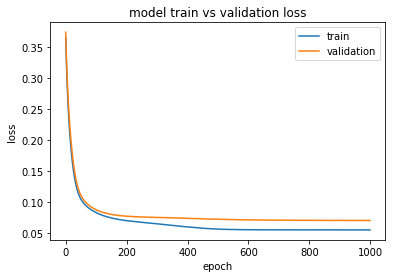

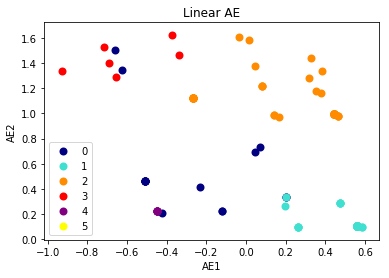

In [19]:

from keras.layers import Input, Dense
from keras.models import Model
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


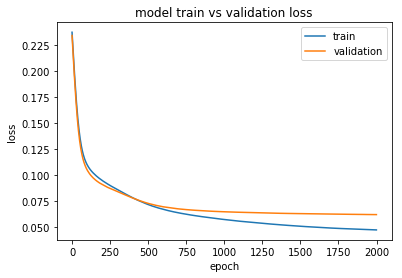

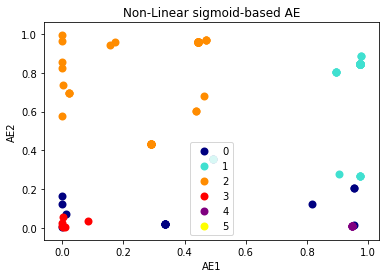

In [20]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


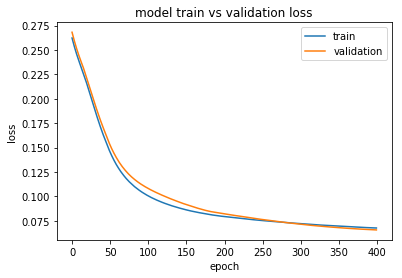

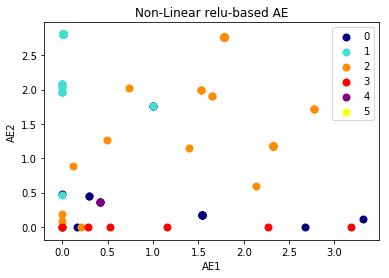

In [21]:
from keras import regularizers
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

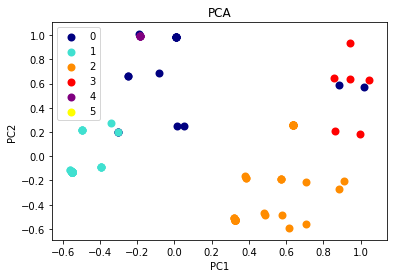

In [23]:

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

In [27]:
from sklearn import metrics
labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [5]:
  estimators = [('PCA'    , KModes(n_clusters=5, init='Huang', n_init=5, verbose=1), pca_transformed),
                ('AE linear' , KModes(n_clusters=5, init='Huang', n_init=5, verbose=1), encoded_data),
                ('AE sigmoid' , KModes(n_clusters=5, init='Huang', n_init=5, verbose=1), encoded_data2),
                ('AE relu', KModes(n_clusters=5, init='Huang', n_init=5, verbose=1), encoded_data3)]

  print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
      print(name,':')
#       if name == 'AE linear' :
#         df7['clusters'] = labels
#         print("save")
#       print(labels[:]) 
      print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % metrics.adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % metrics.adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            % metrics.silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()

<class 'pandas.core.series.Series'>
Number of clusters: 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 120.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 114.0
Best run was number 5
PCA :
Homogeneity: 0.479
Completeness: 0.507
V-measure: 0.493
Adjusted Rand Index: 0.339
Adjusted Mutual Information: 0.455
Silhouette Coefficient: 0.358

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 106.0
Ini